In [ ]:
print("Hello World")

Hello World


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,617 kB/s)
Selecting previously unselected

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from shapely.geometry import Point, Polygon
import geopandas as gpd
import descartes
import json

print("Import Done")

Import Done


In [72]:
df_uber_pickups_april = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-apr14.csv')
df_uber_pickups_may = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-may14.csv')
df_uber_pickups_june = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-jun14.csv')
df_uber_pickups_july = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-jul14.csv')
df_uber_pickups_august = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-aug14.csv')
df_uber_pickups_sept = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/uber-raw-data-sep14.csv')

print("Done")

Done


In [73]:
df_nyc_demogr_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/nyc_census_tracts.csv')
print("Done")

Done


In [74]:
print("Uber Pickups")

print("April : ", df_uber_pickups_april.shape)
print("May : ", df_uber_pickups_may.shape)
print("June : ", df_uber_pickups_june.shape)
print("July : ", df_uber_pickups_july.shape)
print("August : ", df_uber_pickups_august.shape)
print("September : ", df_uber_pickups_sept.shape)


print("\nNew York City Census")

# print("Block Codes : ", df_nyc_block_codes.shape)
print("Demographic Features : ", df_nyc_demogr_features.shape)

Uber Pickups
April :  (564516, 4)
May :  (652435, 4)
June :  (663844, 4)
July :  (796121, 4)
August :  (829275, 4)
September :  (1028136, 4)

New York City Census
Demographic Features :  (2167, 36)


In [75]:
df_uber_pickups_overall = pd.DataFrame()
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_april)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_may)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_june)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_july)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_august)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_sept)
print(df_uber_pickups_overall.shape)

(564516, 4)
(1216951, 4)
(1880795, 4)
(2676916, 4)
(3506191, 4)
(4534327, 4)


In [189]:
df_uber_pickups_overall.reset_index(inplace=True)

In [190]:
df_uber_pickups_overall

index           Date/Time  ...    Base                    geometry
0              0    4/1/2014 0:11:00  ...  B02512  POINT (-73.95490 40.76900)
1              1    4/1/2014 0:17:00  ...  B02512  POINT (-74.03450 40.72670)
2              2    4/1/2014 0:21:00  ...  B02512  POINT (-73.98730 40.73160)
3              3    4/1/2014 0:28:00  ...  B02512  POINT (-73.97760 40.75880)
4              4    4/1/2014 0:33:00  ...  B02512  POINT (-73.97220 40.75940)
...          ...                 ...  ...     ...                         ...
4534322  1028131  9/30/2014 22:57:00  ...  B02764  POINT (-73.98450 40.76680)
4534323  1028132  9/30/2014 22:57:00  ...  B02764  POINT (-74.17730 40.69110)
4534324  1028133  9/30/2014 22:58:00  ...  B02764  POINT (-73.93190 40.85190)
4534325  1028134  9/30/2014 22:58:00  ...  B02764  POINT (-74.00660 40.70810)
4534326  1028135  9/30/2014 22:58:00  ...  B02764  POINT (-73.94960 40.71400)

[4534327 rows x 6 columns]

In [21]:
# df_uber_pickups_overall.loc[df_uber_pickups_overall['Lat'] == 40.76]

In [77]:
df_uber_pickups_overall = df_uber_pickups_overall.rename(columns={'Lat' : 'Latitude', 'Lon' : 'Longitude'})

In [78]:
df_uber_pickups_overall.head()

Date/Time  Latitude  Longitude    Base
0  4/1/2014 0:11:00   40.7690   -73.9549  B02512
1  4/1/2014 0:17:00   40.7267   -74.0345  B02512
2  4/1/2014 0:21:00   40.7316   -73.9873  B02512
3  4/1/2014 0:28:00   40.7588   -73.9776  B02512
4  4/1/2014 0:33:00   40.7594   -73.9722  B02512

In [79]:
# df_nyc_demogr_features

In [80]:
# df_nyc_demogr_features.loc[df_nyc_demogr_features['Borough'] == 'Brooklyn']

In [81]:
gdf1 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Uber_Datasets/nyct2020wi_21c/nyct2020wi.shp')
print("Done")

Done


In [82]:
gdf1.head()

CTLabel  ...                                           geometry
0       1  ...  MULTIPOLYGON (((972081.788 190733.467, 972184....
1    2.01  ...  POLYGON ((988012.660 196152.484, 987984.769 19...
2    2.02  ...  POLYGON ((990021.719 196479.331, 990013.071 19...
3       5  ...  POLYGON ((979979.564 194059.132, 980002.438 19...
4       6  ...  POLYGON ((986961.185 199553.643, 987206.139 19...

[5 rows x 14 columns]

In [83]:
gdf1.shape

(2327, 14)

In [84]:
gdf1.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

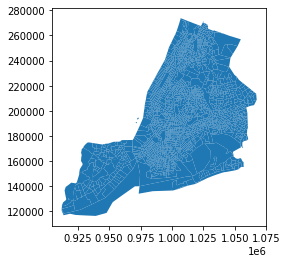

In [85]:
gdf1.plot()

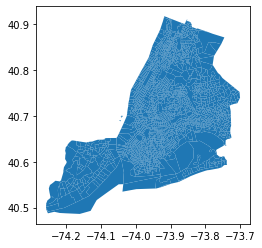

In [86]:
gdf1.to_crs(epsg=4326).plot()

In [87]:
gdf1 = gdf1.to_crs(epsg=4326)
gdf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
gdf1.loc[gdf1['GEOID'] == '36005000100']

CTLabel  ...                                           geometry
310       1  ...  POLYGON ((-73.87021 40.79091, -73.87097 40.789...

[1 rows x 14 columns]

In [89]:
len(pd.unique(gdf1['GEOID']))

2327

In [90]:
gdf1 = gdf1.rename(columns={'GEOID' : 'CensusTract'})
gdf1.head()

CTLabel  ...                                           geometry
0       1  ...  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...
1    2.01  ...  POLYGON ((-73.98643 40.70507, -73.98653 40.704...
2    2.02  ...  POLYGON ((-73.97918 40.70597, -73.97921 40.705...
3       5  ...  POLYGON ((-74.01540 40.69932, -74.01532 40.699...
4       6  ...  POLYGON ((-73.99022 40.71440, -73.98934 40.714...

[5 rows x 14 columns]

In [91]:
gdf1.dtypes

CTLabel          object
BoroCode         object
BoroName         object
CT2020           object
BoroCT2020       object
CDEligibil       object
NTAName          object
NTA2020          object
CDTA2020         object
CDTANAME         object
CensusTract      object
Shape_Leng      float64
Shape_Area      float64
geometry       geometry
dtype: object

In [92]:
gdf1["CensusTract"] = pd.to_numeric(gdf1["CensusTract"])
gdf1.dtypes

CTLabel          object
BoroCode         object
BoroName         object
CT2020           object
BoroCT2020       object
CDEligibil       object
NTAName          object
NTA2020          object
CDTA2020         object
CDTANAME         object
CensusTract       int64
Shape_Leng      float64
Shape_Area      float64
geometry       geometry
dtype: object

In [93]:
gdf_uber = gpd.GeoDataFrame(df_uber_pickups_overall, crs="EPSG:4326",
                geometry=gpd.points_from_xy(df_uber_pickups_overall.Longitude, df_uber_pickups_overall.Latitude))
gdf_uber

Date/Time  Latitude  ...    Base                    geometry
0          4/1/2014 0:11:00   40.7690  ...  B02512  POINT (-73.95490 40.76900)
1          4/1/2014 0:17:00   40.7267  ...  B02512  POINT (-74.03450 40.72670)
2          4/1/2014 0:21:00   40.7316  ...  B02512  POINT (-73.98730 40.73160)
3          4/1/2014 0:28:00   40.7588  ...  B02512  POINT (-73.97760 40.75880)
4          4/1/2014 0:33:00   40.7594  ...  B02512  POINT (-73.97220 40.75940)
...                     ...       ...  ...     ...                         ...
1028131  9/30/2014 22:57:00   40.7668  ...  B02764  POINT (-73.98450 40.76680)
1028132  9/30/2014 22:57:00   40.6911  ...  B02764  POINT (-74.17730 40.69110)
1028133  9/30/2014 22:58:00   40.8519  ...  B02764  POINT (-73.93190 40.85190)
1028134  9/30/2014 22:58:00   40.7081  ...  B02764  POINT (-74.00660 40.70810)
1028135  9/30/2014 22:58:00   40.7140  ...  B02764  POINT (-73.94960 40.71400)

[4534327 rows x 5 columns]

In [94]:
gdf_uber.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
gdf_integrated = gpd.sjoin(gdf_uber, gdf1, how='inner', op="within")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [96]:
gdf_integrated

Date/Time  Latitude  ...    Shape_Leng    Shape_Area
0         4/1/2014 0:11:00   40.7690  ...   7228.555626  2.676180e+06
15        4/1/2014 2:31:00   40.7666  ...   7228.555626  2.676180e+06
388      4/1/2014 12:57:00   40.7657  ...   7228.555626  2.676180e+06
428      4/1/2014 13:40:00   40.7651  ...   7228.555626  2.676180e+06
494      4/1/2014 14:57:00   40.7682  ...   7228.555626  2.676180e+06
...                    ...       ...  ...           ...           ...
549950   9/22/2014 6:18:00   40.5390  ...  18208.146964  1.495141e+07
588925  9/25/2014 16:25:00   40.6787  ...   5151.950077  1.637676e+06
611171  9/27/2014 12:32:00   40.5522  ...  16551.226189  1.580172e+07
827994  9/27/2014 11:23:00   40.5952  ...   6387.820489  1.896046e+06
878169   9/7/2014 17:28:00   40.6265  ...   7927.295854  3.338848e+06

[4413117 rows x 19 columns]

In [98]:
gdf_integrated['Pickups'] = 1
gdf_integrated.head()

Date/Time  Latitude  Longitude  ...   Shape_Leng    Shape_Area  Pickups
0     4/1/2014 0:11:00   40.7690   -73.9549  ...  7228.555626  2.676180e+06        1
15    4/1/2014 2:31:00   40.7666   -73.9531  ...  7228.555626  2.676180e+06        1
388  4/1/2014 12:57:00   40.7657   -73.9549  ...  7228.555626  2.676180e+06        1
428  4/1/2014 13:40:00   40.7651   -73.9531  ...  7228.555626  2.676180e+06        1
494  4/1/2014 14:57:00   40.7682   -73.9530  ...  7228.555626  2.676180e+06        1

[5 rows x 20 columns]

In [123]:
df_test = gdf_integrated.groupby('CensusTract')['Pickups'].sum()

In [124]:
df_test

CensusTract
36005000200     43
36005000400     76
36005001600     65
36005001901    290
36005001902    200
              ... 
36085030301     46
36085030302     15
36085031901      1
36085031902      2
36085032300      1
Name: Pickups, Length: 2299, dtype: int64

In [125]:
gdf_test.sum()

4413117

In [126]:
df_uber_block_wise = gdf_test.to_frame().reset_index()

In [127]:
df_uber_block_wise

CensusTract  Pickups
0     36005000200       43
1     36005000400       76
2     36005001600       65
3     36005001901      290
4     36005001902      200
...           ...      ...
2294  36085030301       46
2295  36085030302       15
2296  36085031901        1
2297  36085031902        2
2298  36085032300        1

[2299 rows x 2 columns]

In [128]:
# gdf1, df_uber_block_wise
gdftemp_integrated = gdf1.merge(df_uber_block_wise, on='CensusTract')

In [143]:
gdftemp_integrated

CTLabel  ... Pickups
0       2.01  ...    1549
1       2.02  ...    1905
2          5  ...      21
3          6  ...    4129
4          7  ...   30569
...      ...  ...     ...
2294  303.01  ...      46
2295  303.02  ...      15
2296  319.01  ...       1
2297  319.02  ...       2
2298     323  ...       1

[2299 rows x 15 columns]

In [144]:
gdftemp_integrated.isna().sum()

CTLabel           0
BoroCode          0
BoroName          0
CT2020            0
BoroCT2020        0
CDEligibil     2299
NTAName           0
NTA2020           0
CDTA2020          0
CDTANAME          0
CensusTract       0
Shape_Leng        0
Shape_Area        0
geometry          0
Pickups           0
dtype: int64

In [145]:
gdf_integrated_census_stats = gdftemp_integrated.merge(df_nyc_demogr_features, on='CensusTract')

In [146]:
gdf_integrated_census_stats

CTLabel BoroCode       BoroName  ... SelfEmployed FamilyWork Unemployment
0       2.01        1      Manhattan  ...          2.8        0.0          2.6
1       2.02        1      Manhattan  ...          6.1        0.0         15.1
2          5        1      Manhattan  ...          NaN        NaN          NaN
3          6        1      Manhattan  ...          4.8        0.0          8.7
4          7        1      Manhattan  ...          2.5        0.0          4.4
...      ...      ...            ...  ...          ...        ...          ...
2011  303.01        5  Staten Island  ...          2.6        0.3          7.4
2012  303.02        5  Staten Island  ...          3.2        0.0          6.2
2013  319.01        5  Staten Island  ...          4.4        0.0         13.8
2014  319.02        5  Staten Island  ...          2.7        0.0          9.4
2015     323        5  Staten Island  ...          3.9        0.0         10.7

[2016 rows x 50 columns]

In [147]:
gdf_integrated_census_stats.isna().sum()

CTLabel               0
BoroCode              0
BoroName              0
CT2020                0
BoroCT2020            0
CDEligibil         2016
NTAName               0
NTA2020               0
CDTA2020              0
CDTANAME              0
CensusTract           0
Shape_Leng            0
Shape_Area            0
geometry              0
Pickups               0
County                0
Borough               0
TotalPop              0
Men                   0
Women                 0
Hispanic             32
White                32
Black                32
Native               32
Asian                32
Citizen               0
Income               56
IncomeErr            56
IncomePerCap         39
IncomePerCapErr      39
Poverty              33
ChildPoverty         51
Professional         34
Service              34
Office               34
Construction         34
Production           34
Drive                34
Carpool              34
Transit              34
Walk                 34
OtherTransp     

In [162]:
gdf_integrated_census_stats.corr(method='pearson')['Pickups']

CensusTract        0.066401
Shape_Leng         0.071898
Shape_Area         0.144138
Pickups            1.000000
TotalPop           0.076788
Men                0.085388
Women              0.067147
Hispanic          -0.193683
White              0.306478
Black             -0.178867
Native             0.071250
Asian              0.014751
Citizen            0.179643
Income             0.496637
IncomeErr          0.389388
IncomePerCap       0.712011
IncomePerCapErr    0.665153
Poverty           -0.163411
ChildPoverty      -0.222520
Professional       0.497621
Service           -0.392346
Office            -0.155989
Construction      -0.314688
Production        -0.362263
Drive             -0.331011
Carpool           -0.261436
Transit           -0.068268
Walk               0.533305
OtherTransp        0.437352
WorkAtHome         0.281594
MeanCommute       -0.557197
Employed           0.232377
PrivateWork        0.236710
PublicWork        -0.326487
SelfEmployed       0.185667
FamilyWork         0

In [163]:
gdf_integrated_census_stats.corr(method='kendall')['Pickups']

CensusTract       -0.064489
Shape_Leng        -0.094167
Shape_Area        -0.056260
Pickups            1.000000
TotalPop           0.197649
Men                0.201855
Women              0.189069
Hispanic          -0.060756
White              0.248485
Black             -0.117107
Native             0.033684
Asian              0.090852
Citizen            0.261211
Income             0.105829
IncomeErr          0.054148
IncomePerCap       0.265590
IncomePerCapErr    0.262893
Poverty           -0.035357
ChildPoverty      -0.087516
Professional       0.335544
Service           -0.250254
Office            -0.179411
Construction      -0.304427
Production        -0.273440
Drive             -0.472622
Carpool           -0.297643
Transit            0.224617
Walk               0.306070
OtherTransp        0.307212
WorkAtHome         0.281024
MeanCommute       -0.383001
Employed           0.285858
PrivateWork        0.152996
PublicWork        -0.261547
SelfEmployed       0.221723
FamilyWork         0

In [164]:
gdf_integrated_census_stats.corr(method='spearman')['Pickups']

CensusTract       -0.085150
Shape_Leng        -0.143869
Shape_Area        -0.084923
Pickups            1.000000
TotalPop           0.286249
Men                0.292046
Women              0.274192
Hispanic          -0.085754
White              0.351783
Black             -0.175752
Native             0.043294
Asian              0.139472
Citizen            0.370227
Income             0.163178
IncomeErr          0.082739
IncomePerCap       0.381232
IncomePerCapErr    0.379725
Poverty           -0.049739
ChildPoverty      -0.130963
Professional       0.480472
Service           -0.361867
Office            -0.267127
Construction      -0.435191
Production        -0.396686
Drive             -0.646700
Carpool           -0.431896
Transit            0.329550
Walk               0.437798
OtherTransp        0.432714
WorkAtHome         0.405712
MeanCommute       -0.530761
Employed           0.407906
PrivateWork        0.223846
PublicWork        -0.375267
SelfEmployed       0.324385
FamilyWork         0

In [194]:
df_uber_pickups_overall.to_json('/content/drive/MyDrive/Colab Notebooks/Uber_DataFrames/df_uber_pickups_overall.json', default_handler=str)

In [177]:
json_string = gdf_integrated_census_stats.to_json()
json_string

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Asian": 46.1, "Black": 6.2, "BoroCT2020": "1000201", "BoroCode": "1", "BoroName": "Manhattan", "Borough": "Manhattan", "CDEligibil": null, "CDTA2020": "MN03", "CDTANAME": "MN03 Lower East Side-Chinatown (CD 3 Equivalent)", "CT2020": "000201", "CTLabel": "2.01", "Carpool": 6.5, "CensusTract": 36061000201, "ChildPoverty": 71.4, "Citizen": 2031, "Construction": 0.0, "County": "New York", "Drive": 11.8, "Employed": 1105, "FamilyWork": 0.0, "Hispanic": 35.3, "Income": 20521.0, "IncomeErr": 4537.0, "IncomePerCap": 13062.0, "IncomePerCapErr": 2962.0, "MeanCommute": 33.0, "Men": 1301, "NTA2020": "MN0301", "NTAName": "Chinatown-Two Bridges", "Native": 0.0, "Office": 26.2, "OtherTransp": 6.3, "Pickups": 1549, "Poverty": 48.6, "PrivateWork": 90.1, "Production": 13.7, "Professional": 22.5, "PublicWork": 7.1, "SelfEmployed": 2.8, "Service": 37.6, "Shape_Area": 1887578.27358, "Shape_Leng": 8010.30522336, "Tota

In [184]:
study_area = json.loads(json_string)

In [2]:
df = gpd.GeoDataFrame.from_features(study_area['features'])

In [ ]:
df